# Understand the Data



In [1]:
import numpy as np  
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

import plotly.express as px  
import plotly.graph_objects as go  
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')


In [2]:
source = r'C:\Users\Rudra\Downloads\Python_Pandas_profiling\nvidia_stock_prices\nvidia_stock_prices.csv '
df = pd.read_csv(source, encoding= 'unicode_escape')
df.sample(7)

,Date,Open,High,Low,Close,Volume
787,2007-02-20,0.546167,0.553167,0.542333,0.550167,625578000
2137,2012-06-27,0.318500,0.330750,0.318500,0.328500,506064000
744,2006-12-14,0.608333,0.621833,0.607833,0.614167,715380000
2888,2015-06-24,0.529750,0.532500,0.522750,0.525250,253368000
4477,2021-10-14,21.288000,21.754999,21.122000,21.746000,243589000
2814,2015-03-10,0.567750,0.578750,0.566750,0.575000,527212000
3809,2019-02-21,3.976500,4.001250,3.879500,3.894250,448548000


In [3]:
df.size

30198

In [4]:
df.shape

(5033, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5033 entries, 0 to 5032
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5033 non-null   object 
 1   Open    5033 non-null   float64
 2   High    5033 non-null   float64
 3   Low     5033 non-null   float64
 4   Close   5033 non-null   float64
 5   Volume  5033 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 236.1+ KB


In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,5033,5033,2004-01-02,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Open,5033.0,NaN,NaN,NaN,5.214671,9.643976,0.080583,0.344,0.544,5.23375,50.216
High,5033.0,NaN,NaN,NaN,5.308604,9.811276,0.083917,0.349,0.55275,5.2965,50.548
Low,5033.0,NaN,NaN,NaN,5.117086,9.465058,0.0775,0.3365,0.5325,5.125,49.411999
Close,5033.0,NaN,NaN,NaN,5.217039,9.644928,0.078583,0.34325,0.542,5.229,50.409
Volume,5033.0,NaN,NaN,NaN,558796209.417842,336340843.028068,45644000.0,348292000.0,491092000.0,681676000.0,5088948000.0


In [7]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

# Data Cleaning 

In [8]:
df['Date'] = pd.to_datetime(df['Date']) #.dt.strftime('%y-%m-%d')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5033 entries, 0 to 5032
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5033 non-null   datetime64[ns]
 1   Open    5033 non-null   float64       
 2   High    5033 non-null   float64       
 3   Low     5033 non-null   float64       
 4   Close   5033 non-null   float64       
 5   Volume  5033 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 236.1 KB


In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

<Axes: >

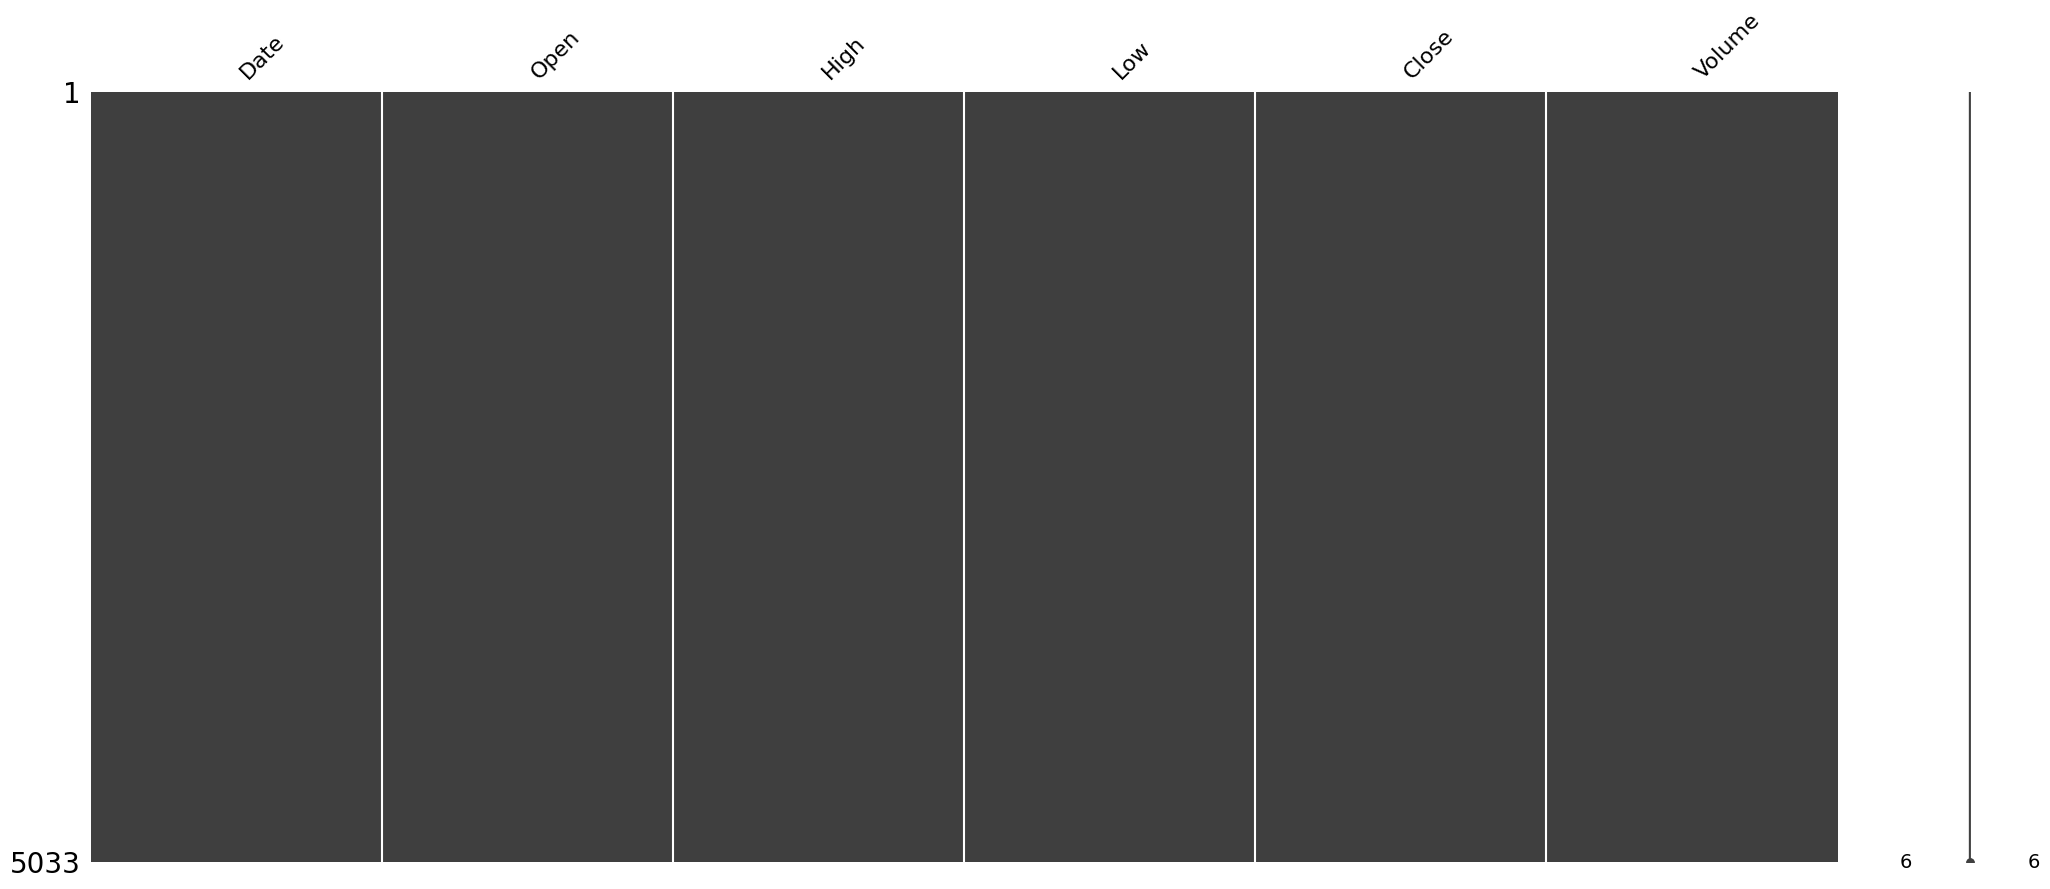

In [12]:
msno.matrix(df)

# Analysis

# Date w/ Volume

In [13]:
fig = px.line(
    df,
    x='Date',
    y='Volume',
    title='Volume W/ Time'
)
fig.show()

# Candlestick View

In [14]:
fig = go.Figure(data=[go.Candlestick(
    x=df['Date'],
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close']
)])

fig.show()

# Ohlc View

In [15]:
fig = go.Figure(data=[go.Ohlc(
    x=df['Date'],
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close']
)])

fig.show()

# Conclusion  

<div class="alert alert-block alert-info">

**Conclusion**
 Nvidia is growing.
</div>